#### [실습] 
1. data 폴더의 house_price_train.csv를 읽어와 'SalePrice','SaleCondition','SaleType','YrSold','LotFrontage','LotArea' 컬럼만 포함하는  DataFrame으로 df_hp 변수에저장

2. SalePrice의 최소값, 최대값, 평균값 그리고 SaleCondition의 고유항목을 출력

3. 수치형 데이터의 결측치(NaN)값을 일괄적으로 해당컬럼의 평균으로 채우기

4. LotFrontage의 데이터타입을 int형으로 바꾸기

5. SalePrice의 히스토그램 그리기

6. SaleType의 그룹별 SalePrice의 평균을 구하여 막대그래프 그리기, x축이 SaleType, 막대높히가 SalePrice의 평균

7. YrSold의 그룹별 SalePrice의 평균을 구하여 선그래프 그리기, x축이 YrSold, y축이 SalePrice의 평균

8. LotArea가 5000보다 크고 15000보다 작은 범위에서 LotArea가 작은순으로 정렬한 데이터프레임 출력

9. LotArea가 x축, SalePrice가 y축 LotFrontage의 3분의1값이 점의 크기를 나타내는 산점도 그래프 그리기

10. 9번의 결과에 SaleCondition에 따라 색이 다르게 표현되는 산점도 그래프 그리기

11. YrSold의 범주 별로 SaleType의 백분율을 나타내는 교차표를 만들고 히트맵으로 출력, 특정 SaleType 총합이 1

12. SaleCondition, YrSold 그룹에서 SalePrice의 평균을 나타내는 피벗테이블 생성, 인덱스가 YrSold 컬럼이 SaleCondition

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')

In [2]:
df_hp = pd.read_csv('data/house_price_train.csv')
df_hp = df_hp[['SalePrice','SaleCondition','SaleType','YrSold','LotFrontage','LotArea']]
df_hp

,SalePrice,SaleCondition,SaleType,YrSold,LotFrontage,LotArea
0,208500,Normal,WD,2008,65.0,8450
1,181500,Normal,WD,2007,80.0,9600
2,223500,Normal,WD,2008,68.0,11250
3,140000,Abnorml,WD,2006,60.0,9550
4,250000,Normal,WD,2008,84.0,14260
...,...,...,...,...,...,...
1455,175000,Normal,WD,2007,62.0,7917
1456,210000,Normal,WD,2010,85.0,13175
1457,266500,Normal,WD,2010,66.0,9042
1458,142125,Normal,WD,2010,68.0,9717


In [3]:
df_hp['SalePrice'].min()
df_hp['SalePrice'].max()
df_hp['SalePrice'].mean()
df_hp['SaleCondition'].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

df_hp = df_hp.fillna(df_hp.mean())

In [4]:
mean = df_hp.mean()
df_fna = df_hp.fillna(mean)

C:\Users\trave\AppData\Local\Temp\ipykernel_30404\3467704924.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_hp.mean()


SalePrice      180921.195890
YrSold           2007.815753
LotFrontage        70.049958
LotArea         10516.828082
dtype: float64

In [6]:
df_hp[['LotArea','LotFrontage']] = df_hp[['LotArea','LotFrontage']].fillna(df_hp[['LotArea','LotFrontage']].mean())
df_hp

,SalePrice,SaleCondition,SaleType,YrSold,LotFrontage,LotArea
0,208500,Normal,WD,2008,65.0,8450
1,181500,Normal,WD,2007,80.0,9600
2,223500,Normal,WD,2008,68.0,11250
3,140000,Abnorml,WD,2006,60.0,9550
4,250000,Normal,WD,2008,84.0,14260
...,...,...,...,...,...,...
1455,175000,Normal,WD,2007,62.0,7917
1456,210000,Normal,WD,2010,85.0,13175
1457,266500,Normal,WD,2010,66.0,9042
1458,142125,Normal,WD,2010,68.0,9717


In [7]:
df_hp['LotFrontage'] = df_hp['LotFrontage'].astype('int')
df_hp

,SalePrice,SaleCondition,SaleType,YrSold,LotFrontage,LotArea
0,208500,Normal,WD,2008,65,8450
1,181500,Normal,WD,2007,80,9600
2,223500,Normal,WD,2008,68,11250
3,140000,Abnorml,WD,2006,60,9550
4,250000,Normal,WD,2008,84,14260
...,...,...,...,...,...,...
1455,175000,Normal,WD,2007,62,7917
1456,210000,Normal,WD,2010,85,13175
1457,266500,Normal,WD,2010,66,9042
1458,142125,Normal,WD,2010,68,9717


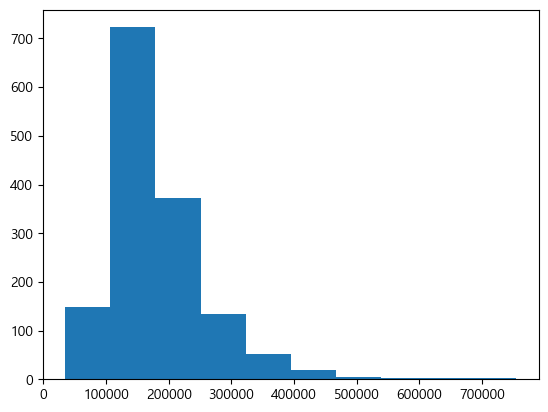

In [8]:
plt.hist(df_hp['SalePrice'])
plt.show()

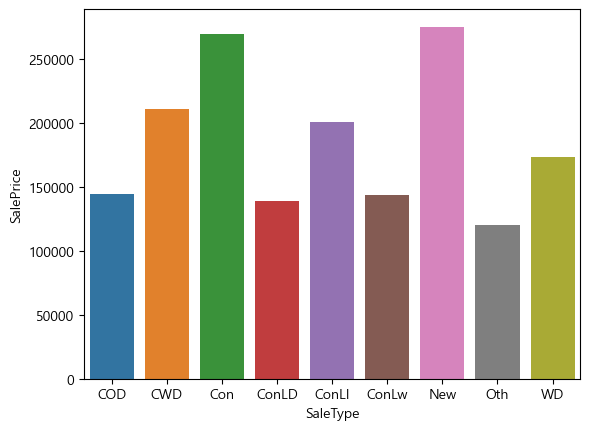

In [9]:
df_grp = df_hp.groupby('SaleType',as_index = False)['SalePrice'].mean()
sns.barplot(data = df_grp, x ='SaleType' ,y = 'SalePrice')
plt.show()

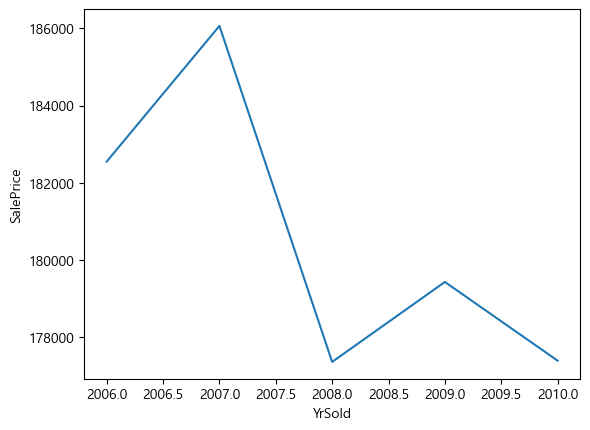

In [8]:
df_grp = df_hp.groupby('YrSold',as_index = False)['SalePrice'].mean()
sns.lineplot(data = df_grp, x ='YrSold' ,y = 'SalePrice')
# plt.xticks(df_grp['YrSold'])
plt.show()

In [6]:
df_sort = df_hp.sort_values('LotArea')
df_sort = df_sort[(df_sort['LotArea'] < 15000) & (df_sort['LotArea'] > 5000)]
df_sort.iloc[1]

SalePrice        207500
SaleCondition    Normal
SaleType             WD
YrSold             2007
LotFrontage         NaN
LotArea            5062
Name: 685, dtype: object

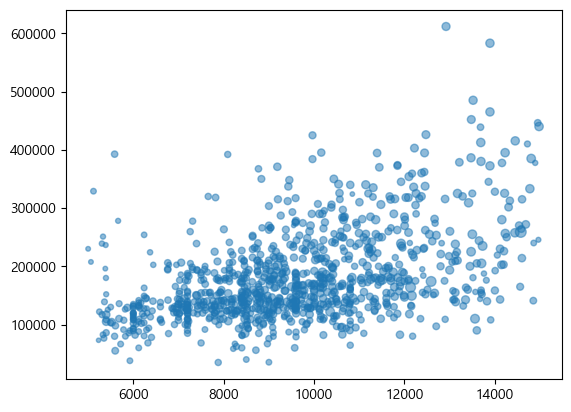

In [8]:
plt.scatter(df_sort['LotArea'], df_sort['SalePrice'], s=df_sort['LotFrontage']/3, alpha=0.5)
plt.show()

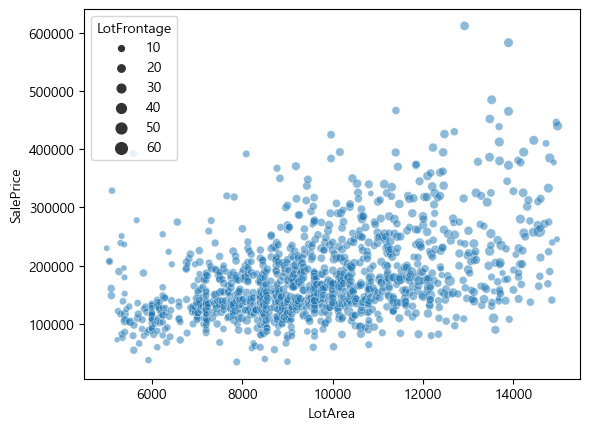

In [13]:
sns.scatterplot(data=df_sort, x= 'LotArea', y='SalePrice', size = df_sort['LotFrontage']/3, alpha=0.5)
plt.show()

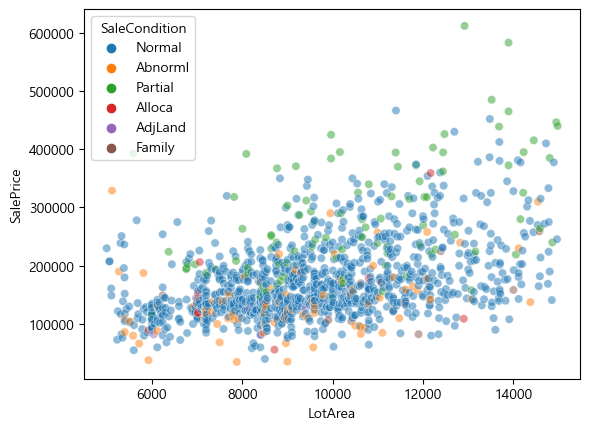

In [14]:
sns.scatterplot(data=df_sort, x= 'LotArea', y='SalePrice', hue ='SaleCondition' , alpha=0.5)
plt.show()

<AxesSubplot: xlabel='YrSold', ylabel='SaleType'>

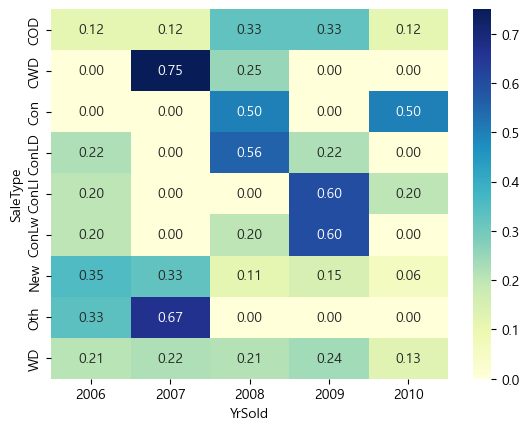

In [15]:
ctab_df = pd.crosstab(df_hp['SaleType'], df_hp['YrSold'], normalize='index')
sns.heatmap(ctab_df, cmap='YlGnBu', annot=True, fmt='.2f')


In [10]:
pivot = pd.pivot_table(df_hp, values='SalePrice', index=['YrSold'],
                    columns=['SaleCondition'], aggfunc='mean')
pivot

SaleCondition,Abnorml,AdjLand,Alloca,Family,Normal,Partial
YrSold,,,,,,
2006,142857.363636,104250.0,274970.000000,138500.000000,175522.612335,259793.813953
2007,198346.153846,126000.0,216398.333333,176142.857143,175312.124528,254259.225000
2008,154500.000000,82000.0,157629.500000,NaN,172062.556818,303213.812500
2009,132692.173913,NaN,142622.400000,131000.000000,177025.190972,289829.684211
2010,109997.818182,NaN,55993.000000,129000.000000,176513.915584,333825.857143
